In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import ImpZeff
import numpy as np
import matplotlib.pyplot as plt
import sk_plotting_functions as spf
import input

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
P_in = 64   # Input power [MW/m^2]
n_avg = 2   # Line-averaged [1e-19/m^3]
run_dir = '/Users/dpower/Documents/01 - PhD/14 - ELM investigation/01 - Runs/01 - Equilibria/02 - Kinetic/P_in = ' + str(P_in) + 'MW/Output_job_EQ_K64_' + str(n_avg) + 'e19'

skrun = spf.SKRun(run_dir)
species = ImpZeff.run(run_dir,evolve=False)

q_imp (kinetic) =  0.06MW/m^2
q_imp (fluid) =  0.08MW/m^2


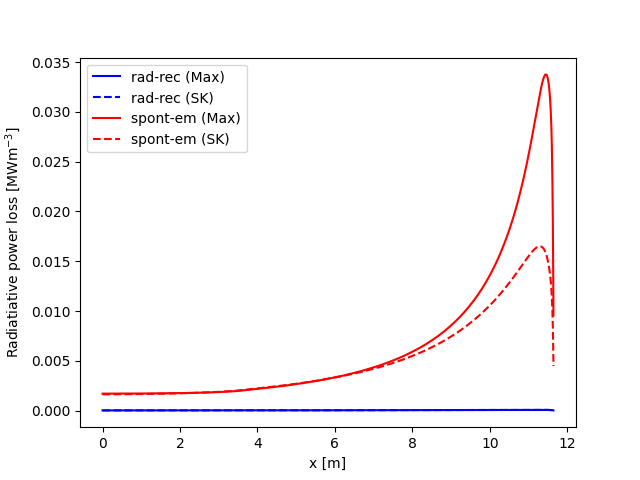

In [40]:
species['C'].plot_radiation()

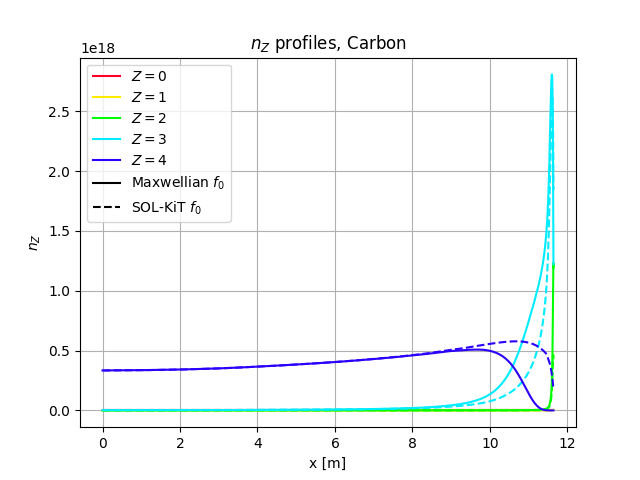

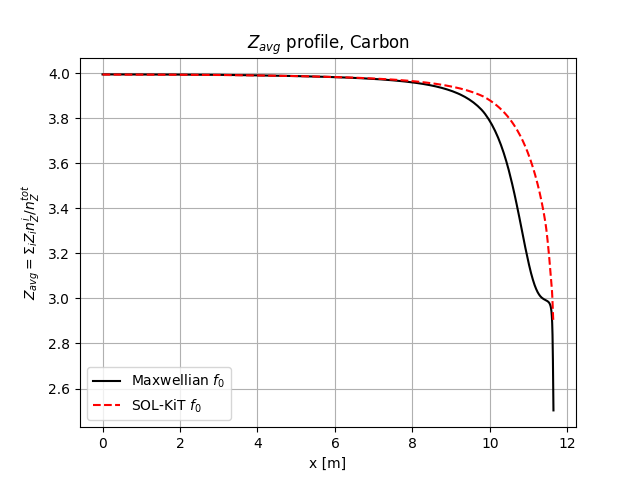

In [31]:
species['C'].plot_dens(normalise_dens=False)
species['C'].plot_Zavg()
# species['C'].plot_Zeff()

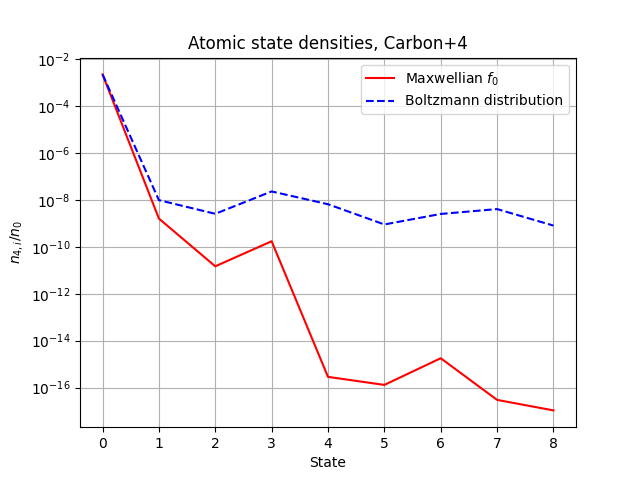

In [32]:
species['C'].plot_atomdist(z=4,cells=100,gnormalise=False)

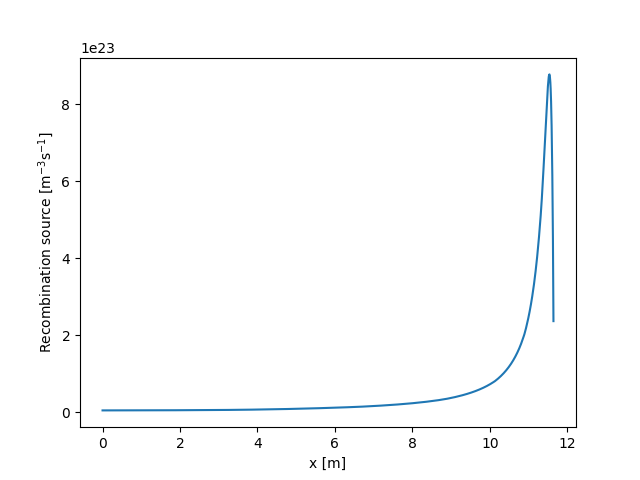

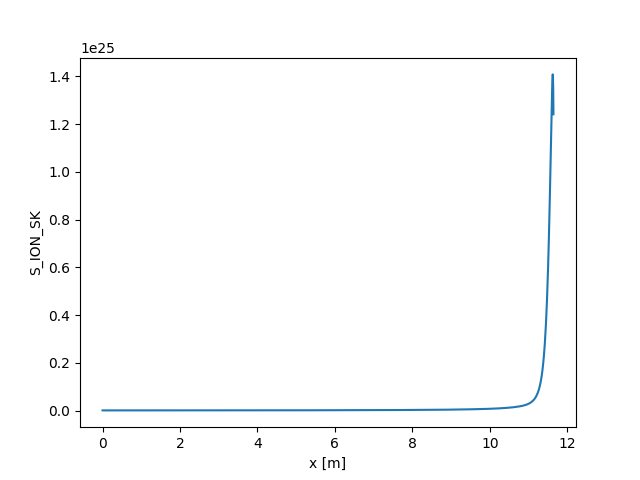

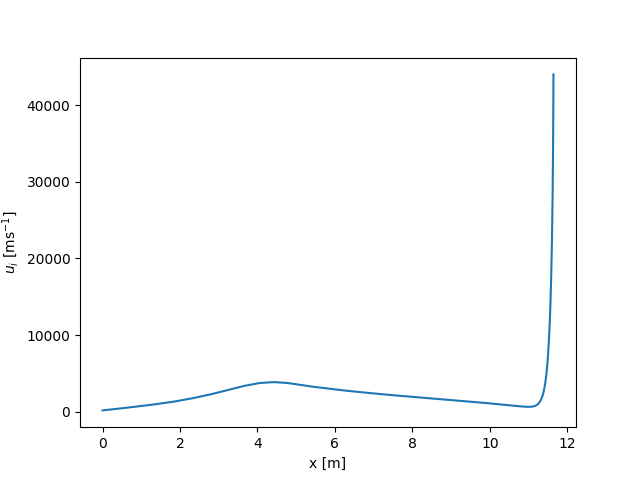

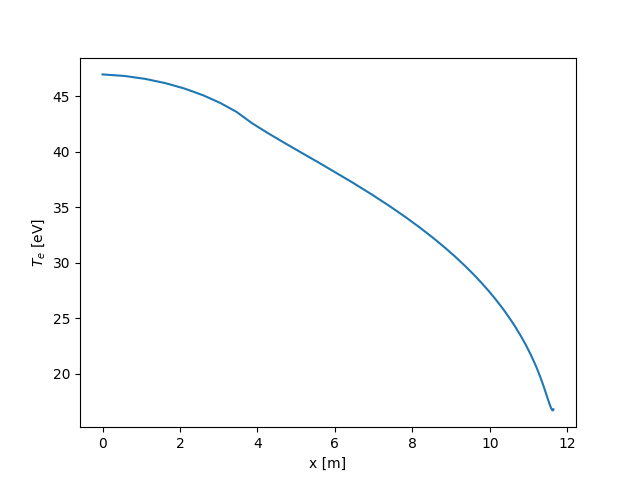

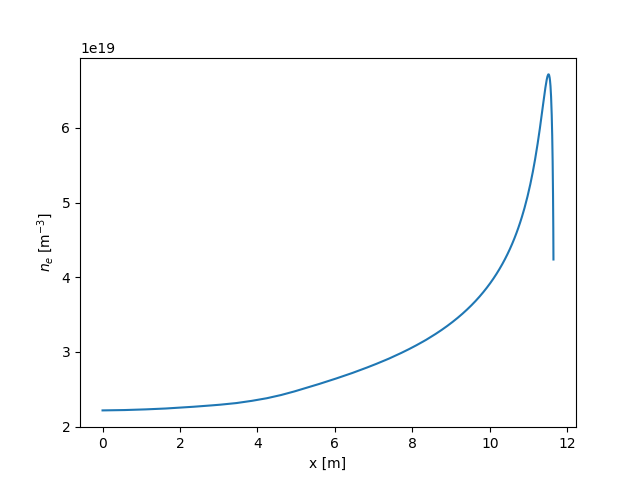

In [3]:
skrun.load_vars(['S_REC','S_ION_SK'])
skrun.profile('S_REC')
skrun.profile('S_ION_SK')
skrun.profile('ION_VEL')
skrun.profile('TEMPERATURE')
skrun.profile('DENSITY')

In [28]:
import re

adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc93##_c6ls.dat'
# adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc96#h_c5ls.dat'
# adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc96#he_c4ls.dat'
# adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc93#li_c3ls.dat'
# adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc96#be_c2ls.dat'
# adasfile = '/Users/dpower/Documents/01 - PhD/01 - Code/08 - Imp-Zeff/imp_data/Carbon/rrc93#b_c1ls.dat'
with open(adasfile) as f:
    lines = f.readlines()

# Some useful functions
def rm1(a):
    return a[0][:-1]
def lmom(l):
    if l == '0':
        return 'S'
    if l == '1':
        return 'P'
    if l == '2':
        return 'D'
    if l == '3':
        return 'F'
    if l == '4':
        return 'G'
def get_statename(line):
    fields = line.split('    ')
    shell = fields[2][1:].lower().replace(' ','-')
    shell = re.sub('[spdfg]1',rm1,shell)
    mom = re.search('\(\d\)\d\(',line)
    s = mom[0][1]
    l = lmom(mom[0][3])
    statw = int(s)*(2*int(mom[0][3])+1)
    # print(shell + ' ' + s + l,statw)
    return shell + ' ' + s + l

def get_weight(line):
    pass

# Get parent and child states
started_to = False
for i,l in enumerate(lines):
    if 'PARENT TERM INDEXING' in l:
        from_start = i+4
    if 'LS RESOLVED TERM INDEXING' in l:
        from_end = i-1
        started_to = True
        to_start = i+4
    if started_to:
        if l == ' \n' or l == '\n':
            to_end = i 
            break 
from_states = []
from_weights = []
to_states = []
to_weights = []
for l in lines[from_start:from_end]:
    from_states.append(get_statename(l))
    from_weights.append(get_weight(l))
for l in lines[to_start:to_end]:
    to_states.append(get_statename(l))
    to_weights.append(get_weight(l))

# Get transitions
started_trans = False
from_trans = []
to_trans = []
for i,l in enumerate(lines):
    if i > 4:
        if 'INDX TE=' in l and 'PRTI=' in lines[i-2]:
            started_trans=True
            from_trans.append(i+2)
        if started_trans:
            if l == ' \n' or l == '\n':
                to_trans.append(i)
                started_trans=False
for i,from_idx in enumerate(from_trans):
    to_idx = to_trans[i]
    parent_idx = i
    for l in lines[from_idx:to_idx]:
        child_idx = int(l.split()[0]) - 1
        # print(parent_idx,to_states[child_idx])
        print(from_states[parent_idx] + '\t' + to_states[child_idx])


 1S	1s 2S
 1S	2s 2S
 1S	2p 2P
 1S	3s 2S
 1S	3p 2P
 1S	3d 2D
 1S	4s 2S
 1S	4p 2P
 1S	4d 2D
 1S	4f 2F
 1S	5s 2S
 1S	5p 2P
 1S	5d 2D
 1S	5f 2F
 1S	5g 2G
